<a href="https://colab.research.google.com/github/soumik12345/Real-Time-Style-Transfer/blob/master/notebooks/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-26fa4b7f-3f0d-59b6-8ded-5e85ffc4222a)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import urllib
from getpass import getpass


user = input('User name: ')
password = getpass('Password: ')
password = urllib.parse.quote(password)
repo_address = input('Repo Address: ')
branch_name = input('Branch name: ')

cmd_string = 'git clone https://{}:{}@github.com/{}.git -b {}'.format(
    user, password, repo_address, branch_name
)

os.system(cmd_string)
cmd_string, password = "", ""

User name: soumik12345
Password: ··········
Repo Address: soumik12345/Real-Time-Style-Transfer
Branch name: master


In [1]:
%cd ./Real-Time-Style-Transfer
!pip install -qq wandb tensorflow-addons

/content/Real-Time-Style-Transfer


In [2]:
import random
from glob import glob
from PIL import Image
from style_transfer import Inferer
from style_transfer.utils import plot_result

In [3]:
image_files = glob(
    '../drive/MyDrive/Datasets/coco_2014_train/train2014/*.jpg')
print(len(image_files))

18281


In [8]:
!wget https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg

--2021-02-24 04:49:19--  https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 99.86.189.83, 99.86.189.115, 99.86.189.49, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|99.86.189.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 884624 (864K) [image/jpeg]
Saving to: ‘Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg’

Starry-Night-canvas 100%[===================>] 863.89K  --.-KB/s    in 0.01s   

2021-02-24 04:49:20 (83.9 MB/s) - ‘Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg’ saved [884624/884624]



In [4]:
inferer = Inferer()
inferer.compile(weights_path='../drive/MyDrive/Models/real_time_style_transfer/experiment_van_gogh_starry_night_tv_loss_2/weights')

In [6]:
content_images = random.sample(image_files, 10)
style_image = './Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg'

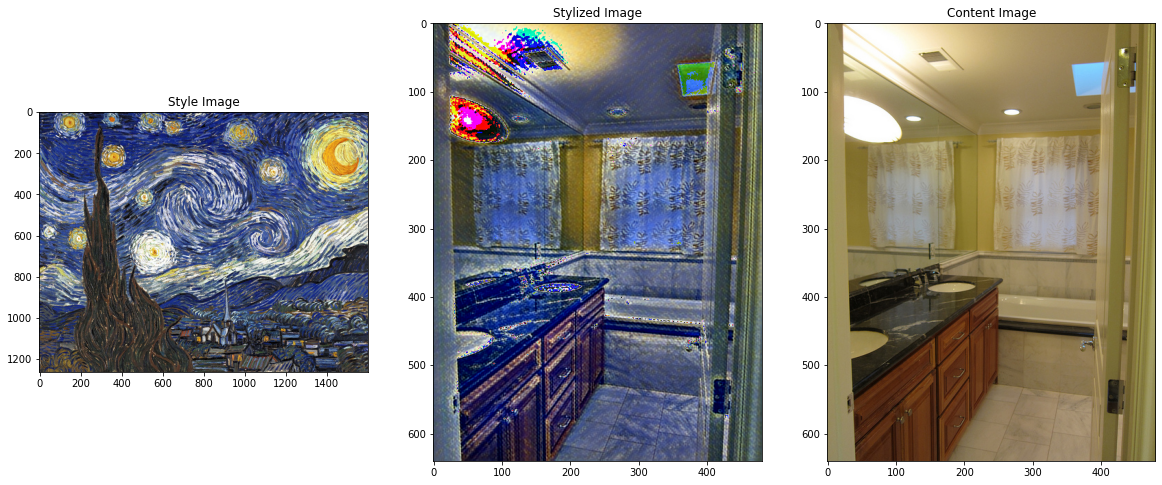

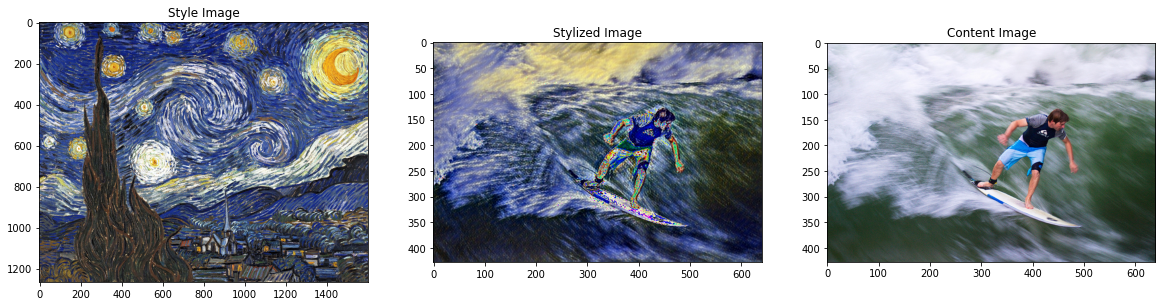

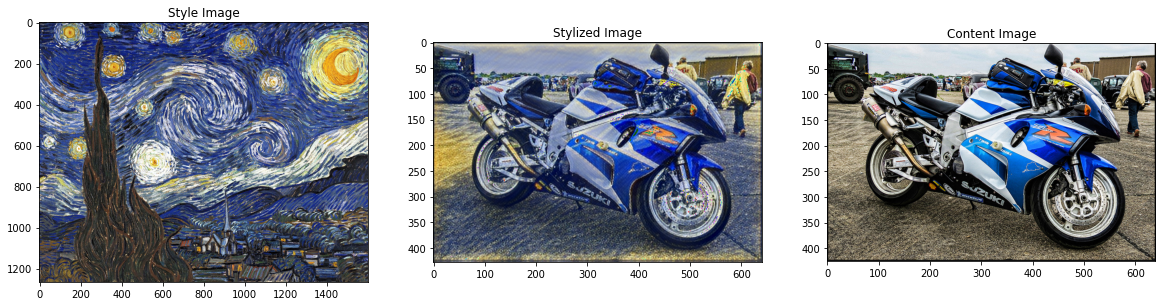

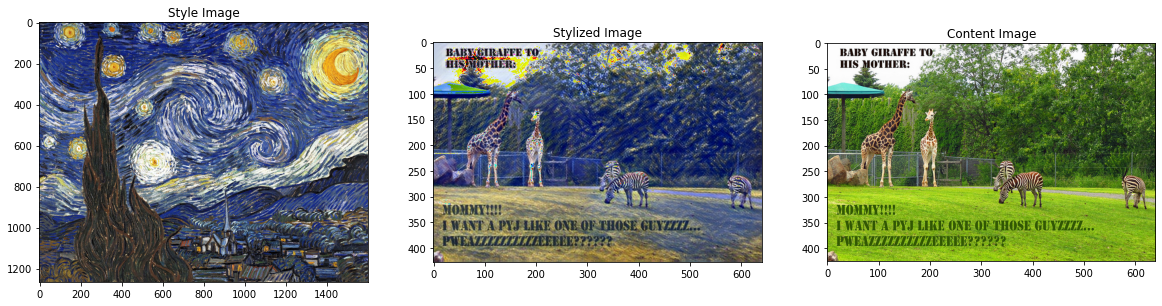

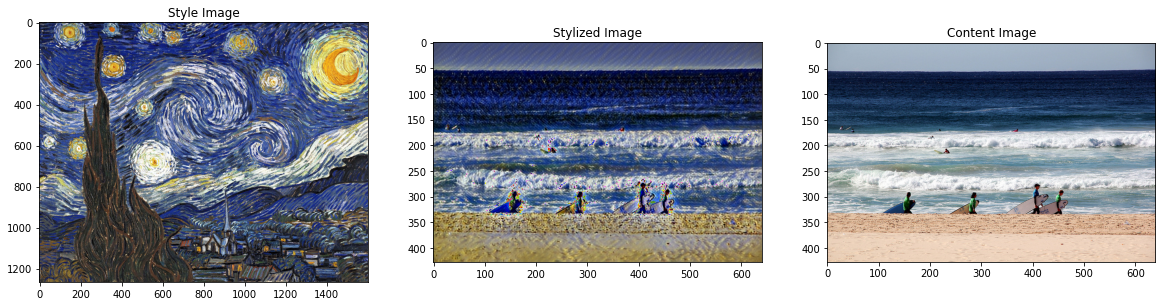

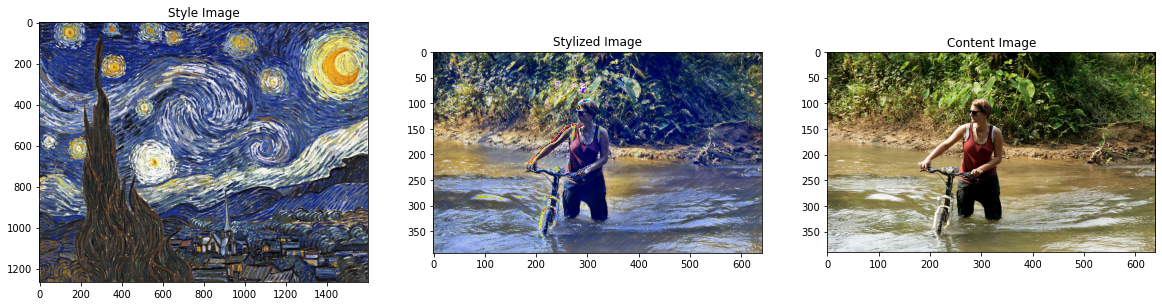

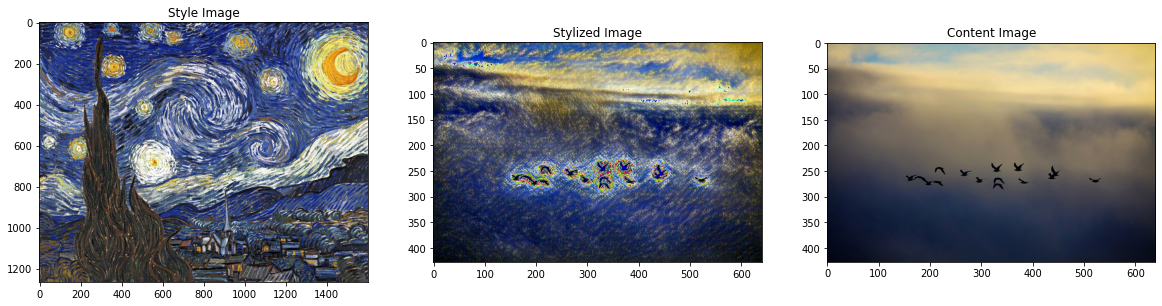

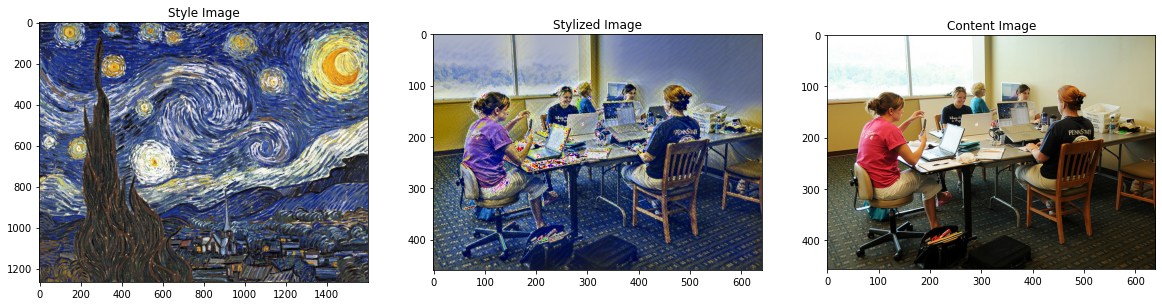

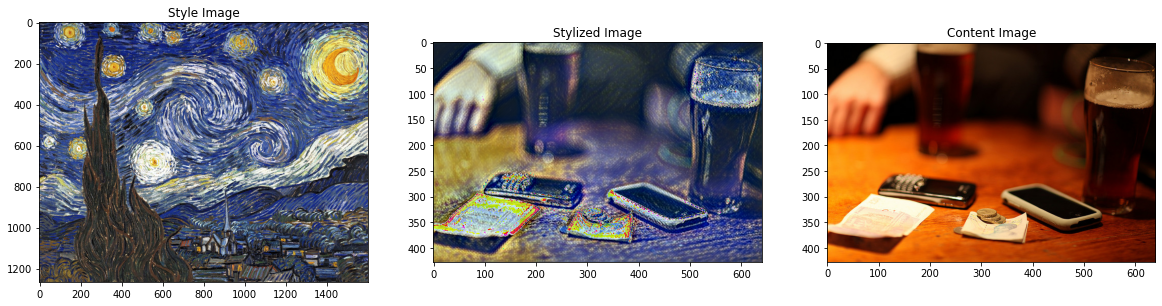

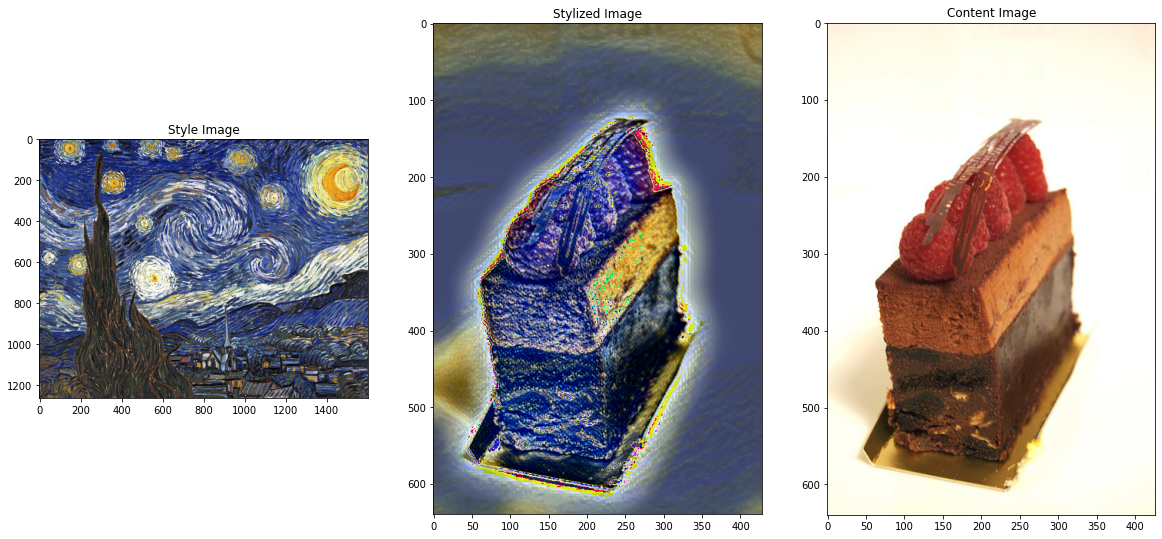

In [7]:
for content_image in content_images:
    stylized_image = inferer.infer(image_file=content_image)
    plot_result(
        Image.open(style_image), Image.open(content_image), stylized_image
    )